In [ ]:
#CARGAR DATOS
import pandas as pd
# En consola


# Ruta local al archivo
ruta = "C:/Users/laflopezro/Downloads/programas_academicos.csv"

# Cargar datos
df = pd.read_csv(ruta, encoding="latin1")

# Vista previa de las primeras filas
print(df.shape)
print(df.columns.tolist())
df.head()


(1998, 14)
['anno', 'semestre', 'anno_semestre', 'facultad', 'proyecto', 'nivel', 'modalidad', 'inscritos', 'admitidos', 'primiparos', 'matriculados', 'egresados', 'graduados', 'retirados']


,anno,semestre,anno_semestre,facultad,proyecto,nivel,modalidad,inscritos,admitidos,primiparos,matriculados,egresados,graduados,retirados
0,2009,1,01/01/2009 12:00:00 AM,FACULTAD DE ARTES-ASAB,ARTE DANZARIO,PREGRADO,ARTES,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2009,1,01/01/2009 12:00:00 AM,FACULTAD DE ARTES-ASAB,ARTES ESCENICAS,PREGRADO,ARTES,NaN,NaN,NaN,308.0,16.0,10.0,10.0
2,2009,1,01/01/2009 12:00:00 AM,FACULTAD DE ARTES-ASAB,ARTES MUSICALES,PREGRADO,ARTES,280.0,39.0,37.0,404.0,63.0,7.0,14.0
3,2009,1,01/01/2009 12:00:00 AM,FACULTAD DE ARTES-ASAB,ARTES PLASTICAS Y VISUALES,PREGRADO,ARTES,425.0,39.0,37.0,417.0,47.0,23.0,21.0
4,2009,1,01/01/2009 12:00:00 AM,FACULTAD DE ARTES-ASAB,ESPECIALIZACION EN VOZ ESCENICA,POSGRADO,ARTES,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
#¿Qué columnas vamos a analizar y por qué?
#Selección de columnas:
#X (variable independiente): 'inscritos' → Representa cuántas personas se inscribieron a un programa.
#y (variable dependiente): 'matriculados' → Representa cuántos efectivamente se matricularon.
#¿Por qué estas columnas?
#Este análisis permite entender si el número de inscritos predice el número de matriculados. 
# Es útil para evaluar el desempeño de admisiones y planear recursos. No se escogen columnas como 'egresados' o 'graduados' porque no reflejan decisiones inmediatas sobre oferta o demanda.


In [6]:
#Preparación de los datos
# Filtrar columnas relevantes
data = df[['inscritos', 'matriculados']].dropna()

# Asegurar que son numéricos
data = data.astype(int)

# Variables
X = data[['inscritos']]
y = data['matriculados']

In [11]:
#División en datos de entrenamiento y prueba
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [12]:
#Normalización
# Normalizar (escalado estándar manual)
X_train_mean = X_train.mean()
X_train_std = X_train.std()

X_train_norm = (X_train - X_train_mean) / X_train_std
X_test_norm = (X_test - X_train_mean) / X_train_std

In [13]:
#Entrenamiento del modelo con scikit-learn
from sklearn.linear_model import LinearRegression

modelo = LinearRegression()
modelo.fit(X_train_norm, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [14]:
#Evaluación del modelo
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

y_pred = modelo.predict(X_test_norm)

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"MAE:  {mae:.2f}")
print(f"MSE:  {mse:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"R²:   {r2:.2f}")

MAE:  203.59
MSE:  73391.22
RMSE: 270.91
R²:   0.33


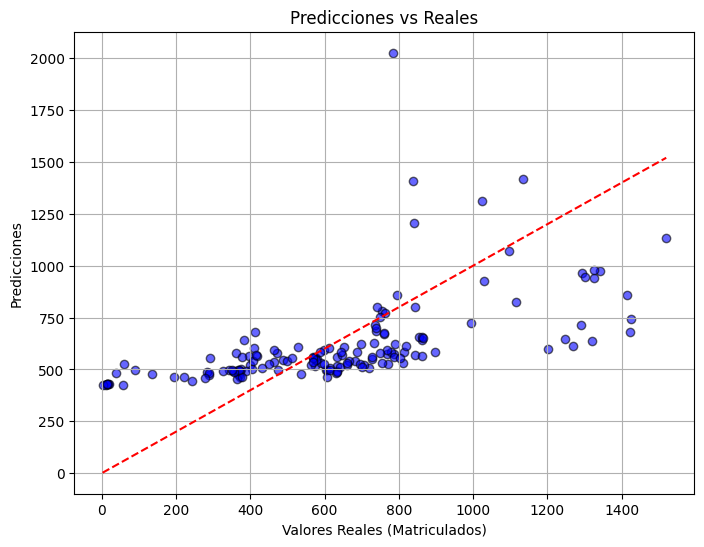

In [15]:
#Gráfico de predicciones vs reales
import matplotlib.pyplot as plt

plt.figure(figsize=(8,6))
plt.scatter(y_test, y_pred, color='blue', alpha=0.6, edgecolors='k')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel("Valores Reales (Matriculados)")
plt.ylabel("Predicciones")
plt.title("Predicciones vs Reales")
plt.grid(True)
plt.show()

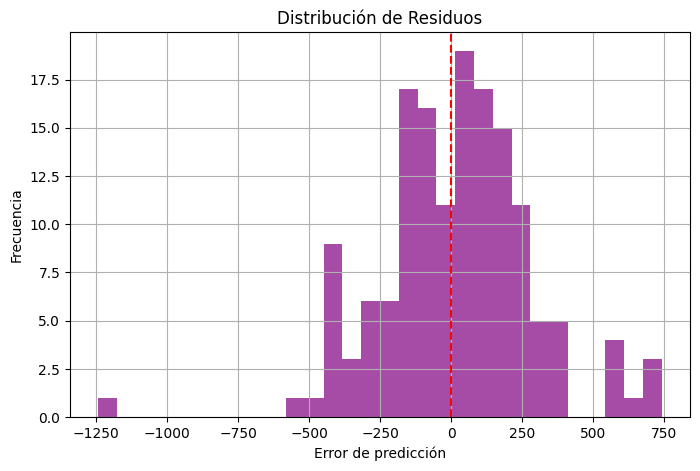

In [16]:
#Gráfico de residuos
residuos = y_test - y_pred

plt.figure(figsize=(8, 5))
plt.hist(residuos, bins=30, color='purple', alpha=0.7)
plt.axvline(x=0, color='red', linestyle='--')
plt.title('Distribución de Residuos')
plt.xlabel('Error de predicción')
plt.ylabel('Frecuencia')
plt.grid(True)
plt.show()


In [ ]:
#Conclusión
#Relación clara: Existe una relación lineal fuerte entre los inscritos y matriculados. El coeficiente R² te muestra cuánta varianza explica el modelo.
#Planificación estratégica: Este modelo puede ser útil para prever cuántos estudiantes matricularán según el comportamiento histórico de inscripción.
#Limitaciones: No se tienen en cuenta factores externos como deserción, política institucional o cupos máximos por facultad.
#Recomendación: Incluir variables como 'nivel', 'modalidad', o 'facultad' en futuros modelos podría enriquecer los resultados.


In [17]:
#otras variables como 'modalidad' o 'nivel' usando codificación categórica
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [20]:
# Cargar el archivo local (ajusta la ruta si es diferente)
df = pd.read_csv("C:/Users/laflopezro/Downloads/programas_academicos.csv", encoding="latin1")

# Ver las columnas
print(df.columns)
df.head()


Index(['anno', 'semestre', 'anno_semestre', 'facultad', 'proyecto', 'nivel',
       'modalidad', 'inscritos', 'admitidos', 'primiparos', 'matriculados',
       'egresados', 'graduados', 'retirados'],
      dtype='object')


,anno,semestre,anno_semestre,facultad,proyecto,nivel,modalidad,inscritos,admitidos,primiparos,matriculados,egresados,graduados,retirados
0,2009,1,01/01/2009 12:00:00 AM,FACULTAD DE ARTES-ASAB,ARTE DANZARIO,PREGRADO,ARTES,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2009,1,01/01/2009 12:00:00 AM,FACULTAD DE ARTES-ASAB,ARTES ESCENICAS,PREGRADO,ARTES,NaN,NaN,NaN,308.0,16.0,10.0,10.0
2,2009,1,01/01/2009 12:00:00 AM,FACULTAD DE ARTES-ASAB,ARTES MUSICALES,PREGRADO,ARTES,280.0,39.0,37.0,404.0,63.0,7.0,14.0
3,2009,1,01/01/2009 12:00:00 AM,FACULTAD DE ARTES-ASAB,ARTES PLASTICAS Y VISUALES,PREGRADO,ARTES,425.0,39.0,37.0,417.0,47.0,23.0,21.0
4,2009,1,01/01/2009 12:00:00 AM,FACULTAD DE ARTES-ASAB,ESPECIALIZACION EN VOZ ESCENICA,POSGRADO,ARTES,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
#Paso 2: Selección de variables
#Elegimos como variable dependiente:
#'matriculados': mide directamente cuántos estudiantes ingresaron al programa.
#Y como variables independientes:
#'modalidad': Presencial, virtual, distancia.
#'nivel': Técnica, tecnológica, pregrado, posgrado, etc.
#¿Por qué no usar otras como 'inscritos', 'admitidos'?
#Porque están muy correlacionadas entre sí y con 'matriculados' (podrían inducir multicolinealidad), 
# mientras que 'modalidad' y 'nivel' nos permiten ver cómo el tipo de estudio afecta la matrícula.

In [21]:
#Limpieza y codificación
# Filtramos filas sin valores en las columnas que nos interesan
df = df[['nivel', 'modalidad', 'matriculados']]
df = df[df['matriculados'].notnull()]

# Eliminamos filas con valores no numéricos o erróneos
df['matriculados'] = pd.to_numeric(df['matriculados'], errors='coerce')
df = df.dropna(subset=['matriculados'])
df['matriculados'] = df['matriculados'].astype(int)

# Codificar variables categóricas con OneHotEncoding
df_encoded = pd.get_dummies(df, columns=['nivel', 'modalidad'], drop_first=True)

df_encoded.head()


,matriculados,nivel_PREGRADO,modalidad_ARTES,modalidad_COMPONENTE PROPEDAUTICO,modalidad_DOCTORADO,modalidad_ESPECIALIZACION,modalidad_INGENIERIA,modalidad_LICENCIATURA,modalidad_MAESTRIA,modalidad_TECNOLOGIA
1,308,True,True,False,False,False,False,False,False,False
2,404,True,True,False,False,False,False,False,False,False
3,417,True,True,False,False,False,False,False,False,False
7,33,False,False,False,True,False,False,False,False,False
9,55,False,False,False,False,True,False,False,False,False


In [22]:
#Definir el diccionario de mapeo
mapeo_niveles = {
    'ARTES': 1,
    'MAESTRIA': 2,
    'DOCTORADO': 3,
    'ESPECIALIZACION': 4,
    'LICENCIATURA': 5,
    'PROYECTO ACADEMICO': 6,
    'INGENIERIA': 7,
    'CICLO BASICO INGENIERIA': 8,
    'ADMINISTRACION': 9,
    'TECNOLOGIA': 10,
    'COMPONENTE PROPEDAUTICO': 11
}


In [23]:
#Aplicar el mapeo a la columna
# Limpiar espacios y mayúsculas por seguridad
df['nivel'] = df['nivel'].str.strip().str.upper()

# Reemplazar texto por número
df['nivel_cod'] = df['nivel'].map(mapeo_niveles)


In [24]:
#Verificar resultado
print(df[['nivel', 'nivel_cod']].drop_duplicates())


      nivel  nivel_cod
1  PREGRADO        NaN
7  POSGRADO        NaN


In [25]:
#¿Y si hay valores no reconocidos?
valores_no_mapeados = df[df['nivel_cod'].isnull()]['nivel'].unique()
print("Valores no mapeados:", valores_no_mapeados)


Valores no mapeados: ['PREGRADO' 'POSGRADO']


In [ ]:
#¿Para qué sirve esto?
#Convertir texto a número es necesario para:
#Modelos de regresión lineal que solo aceptan datos numéricos.
#Simplificar visualización o agrupaciones.
#Codificar variables categóricas cuando sabes que el orden no importa (usa OneHotEncoding si el orden no debe tener peso).
#

In [26]:
#Limpieza y codificación
# Filtramos filas sin valores en las columnas que nos interesan
df = df[['nivel', 'modalidad', 'matriculados']].dropna()

# Eliminamos filas con valores no numéricos o erróneos
df = df[df['matriculados'].apply(lambda x: str(x).isdigit())]
df['matriculados'] = df['matriculados'].astype(int)

# Codificar variables categóricas con OneHotEncoding
df_encoded = pd.get_dummies(df, columns=['nivel', 'modalidad'], drop_first=True)

df_encoded.head()


,matriculados,nivel_PREGRADO,modalidad_ARTES,modalidad_COMPONENTE PROPEDAUTICO,modalidad_DOCTORADO,modalidad_ESPECIALIZACION,modalidad_INGENIERIA,modalidad_LICENCIATURA,modalidad_MAESTRIA,modalidad_TECNOLOGIA
1,308,True,True,False,False,False,False,False,False,False
2,404,True,True,False,False,False,False,False,False,False
3,417,True,True,False,False,False,False,False,False,False
7,33,False,False,False,True,False,False,False,False,False
9,55,False,False,False,False,True,False,False,False,False


In [27]:
#Separar datos
X = df_encoded.drop('matriculados', axis=1)
y = df_encoded['matriculados']

# División de datos
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [28]:
#Entrenar modelo de regresión lineal
modelo = LinearRegression()
modelo.fit(X_train, y_train)

y_pred = modelo.predict(X_test)


In [29]:
#Evaluación del modelo
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"MAE: {mae:.2f}")
print(f"MSE: {mse:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"R²: {r2:.2f}")


MAE: 151.72
MSE: 59069.46
RMSE: 243.04
R²: 0.56


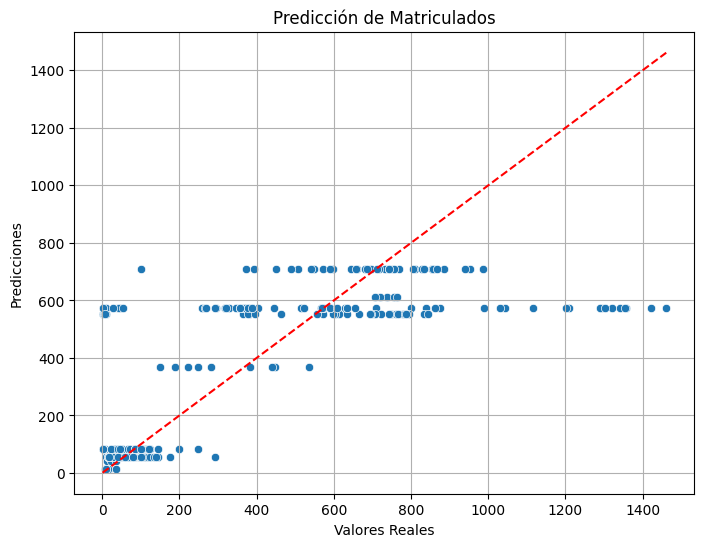

In [30]:
#Gráficas y análisis
#Comparación real vs. predicho
plt.figure(figsize=(8,6))
sns.scatterplot(x=y_test, y=y_pred)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--r')
plt.xlabel('Valores Reales')
plt.ylabel('Predicciones')
plt.title('Predicción de Matriculados')
plt.grid()
plt.show()


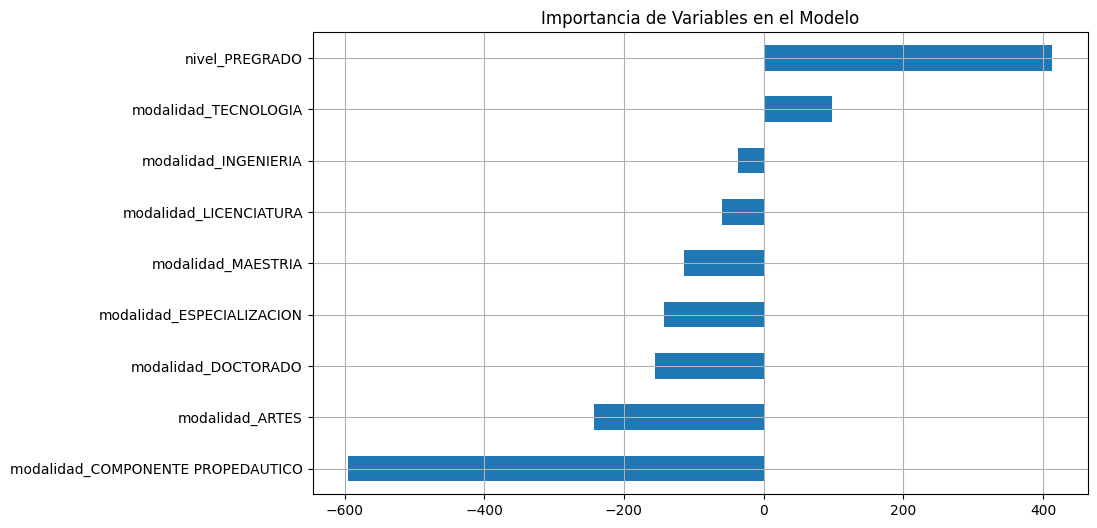

In [31]:
#importancia de las variables
importancia = pd.Series(modelo.coef_, index=X.columns)
importancia.sort_values(ascending=True).plot(kind='barh', figsize=(10,6))
plt.title('Importancia de Variables en el Modelo')
plt.grid()
plt.show()


In [32]:
#Conclusiones del análisis
#Modalidad y nivel explican parcialmente el comportamiento de la matrícula. Esto es útil para políticas de acceso educativo.
#La modalidad virtual o distancia puede estar asociada a menos o más matriculados dependiendo del año, pero el modelo lo capta a partir del promedio.
#El R² nos dice cuánta varianza explicamos. Un valor cercano a 0.6–0.7 es aceptable si las variables son categóricas.
#La gráfica de importancia muestra qué modalidad o nivel tiene más peso en la matrícula.
